In [0]:
# for CUDA
!pip install -U mxnet-cu101mkl==1.6.0  # updating mxnet to at least v1.6
!pip install gluoncv

     |████████████████████████████████| 711.0MB 25kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 757kB 8.5MB/s 


In [ ]:
#for CPU
!pip install mxnet  # updating mxnet to at least v1.6
!pip install gluoncv

In [2]:
import os

import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
import gluoncv as gcv

from mxnet import gluon, autograd
from mxnet.gluon import nn

from mxnet.gluon.data.vision import transforms

from gluoncv import model_zoo, utils

from gluoncv.data import batchify

ctx = [mx.cpu()]

In [0]:
# if GPU is used
num_gpus = 1

ctx = [mx.gpu(i) for i in range(num_gpus)] if num_gpus > 0 else 

In [3]:
params_path = '../trained_parameters/'
symbol_file = os.path.join(params_path, 'ResNet50_v2_epochs50-lr0.001-wd0.001-symbol.json')
params_file = os.path.join(params_path, 'ResNet50_v2_epochs50-lr0.001-wd0.001-0000.params')

# symbol_file = '/content/drive/My Drive/Deep Learning/MXNet/resnet50-food-50epochs-symbol.json'
# params_file = '/content/drive/My Drive/Deep Learning/MXNet/resnet50-food-50epochs-0000.params'

food_classes = ['borscht', 'lagman', 'manty', 'plov', 'samsy']

food_net = nn.SymbolBlock.imports(symbol_file, ['data'], params_file, ctx=ctx)

transform_fn = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

/home/arstan/miniconda3/envs/gluoncv/lib/python3.8/site-packages/mxnet/gluon/block.py:1389: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


100%|██████████| 277/277 [00:02<00:00, 100.50KB/s]


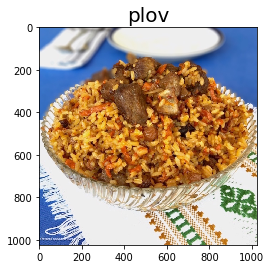

In [4]:
im_address = 'https://petersfoodadventures.com/wp-content/uploads/2016/04/Palava.jpg'
im_fname = utils.download(im_address, path='../test_images/test.jpg', overwrite=True)

test_image = transform_fn(mx.image.imread(im_fname))
test_image = test_image.expand_dims(axis=0).copyto(ctx[0])

utils.viz.plot_image(mx.image.imread(im_fname))

prediction = food_net(test_image)

print()

# fig = plt.gcf()
plt.title(food_classes[int(prediction.argmax().asscalar())], fontsize=20);
# fig.set_size_inches(15, 10)